In [1]:
import os, importlib, sys, time

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import scipy.linalg as la
import scipy.stats as stats

In [9]:
locals().update(np.load("result_parametric_zero_s_eta.npz"))

# 1. Parameters

In [10]:
num_sim = Ys_sim.shape[0]
T = Ys_sim.shape[1]

In [11]:
T0 = 20
alpha = 1
K = 6.5

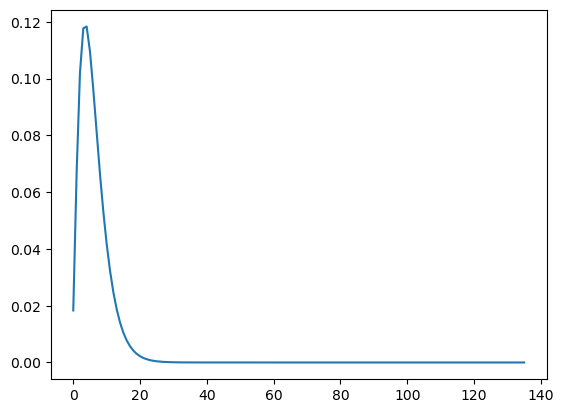

In [12]:
# g
plt.plot(g)

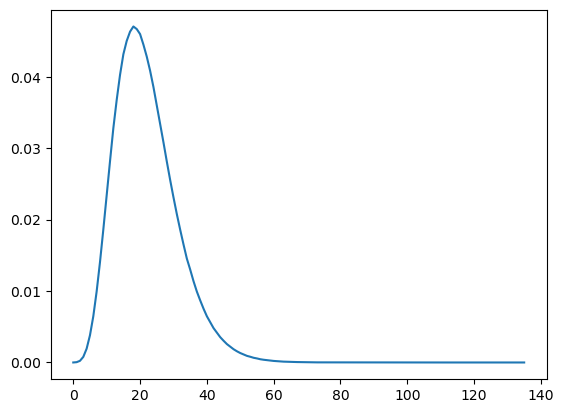

In [13]:
# pi
plt.plot(pi)

In [14]:
# A
d = A.shape[1]

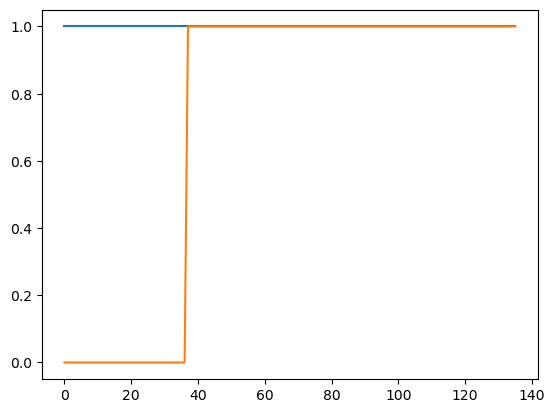

In [15]:
plt.plot(A)

# 3. Wald's Confidence Region coverage test

In [19]:
Ihs_dth = np.zeros([num_sim, 2+d, 2+d])
Ts_dth = np.zeros(num_sim)
ps_dth = np.zeros(num_sim)

In [20]:
for iter_sim in np.arange(num_sim):
    start_sim = time.time()
    
    shat_eps = ssim_eps[iter_sim,-1]
    mhat_0 = msim_0[iter_sim,-1]
    bhat = bsim[iter_sim,-1,:]
    Y_data = Ys_sim[iter_sim]
    
    Rhat = np.zeros(T+T0)
    d1Rh = np.zeros([d, T+T0])
    d2Rh = np.zeros([d, d, T+T0])
    
    for t in np.arange(T+T0):
        o = np.exp(bhat @ A[t])
        p = 1 / (1 + o)
        q = o / (1 + o)

        Rhat[t] = K * p
        d1Rh[:,t] = - K * p * q * A[t]
        d2Rh[:,:,t] = K * p * q * (q - p) * (A[t,:,None] * A[t])
        
    Pi = alpha * np.concatenate([[0],pi])[np.maximum(0, T0 + np.arange(T)[:,None] - np.arange(T+T0))]
    G = Rhat[:,None] * np.concatenate([[0],g])[np.maximum(0, np.arange(T+T0)[:,None] - np.arange(T+T0))]
    d1G = d1Rh[:,:,None] * np.concatenate([[0],g])[
            np.maximum(0, np.arange(T+T0)[:,None] - np.arange(T+T0))]
    d2G = d2Rh[...,None] * np.concatenate([[0],g])[
            np.maximum(0, np.arange(T+T0)[:,None] - np.arange(T+T0))]
    
    inv_ImG = la.inv(np.eye(T+T0)-G)
    Pi_inv_ImG = Pi @ inv_ImG
    
    EY = mhat_0 * Pi_inv_ImG[:,0]
    d1EY = mhat_0 * (Pi_inv_ImG @ (d1G @ inv_ImG[:,:1]))[...,0]
    d2EY = mhat_0 * (Pi_inv_ImG @ (
        d1G[:,None] @ inv_ImG @ d1G @ inv_ImG[:,:1]
        + d1G @ inv_ImG @ d1G[:,None] @ inv_ImG[:,:1]
        + d2G @ inv_ImG[:,:1]))[...,0]
    
    Ed2l_ds2 = - 2 * T / shat_eps**2
    Ed2l_dsdm = 0
    Ed2l_dsdb = np.zeros(d)
    Ed2l_dm2 = - np.sum(Pi_inv_ImG[:,0]**2) / shat_eps**2
    Ed2l_dmdb = - np.sum(Pi_inv_ImG[:,0] * d1EY, 1) / shat_eps**2
    Ed2l_db2 = - d1EY @ d1EY.T / shat_eps**2

    Ed2l_dms2 = np.array(
        [[Ed2l_dm2, Ed2l_dsdm],
         [Ed2l_dsdm, Ed2l_ds2]]
    )
    Ed2l_dmsdb = np.stack([Ed2l_dmdb, Ed2l_dsdb])

    Ihs_dth[iter_sim] = - np.block(
        [[Ed2l_dms2, Ed2l_dmsdb],
         [Ed2l_dmsdb.T, Ed2l_db2]])
    Ts_dth[iter_sim] = (bhat[1]-bmle[1])/np.sqrt(la.inv(Ihs_dth[iter_sim])[-1,-1])
    ps_dth[iter_sim] = 2*(1-stats.norm.cdf(np.abs(Ts_dth[iter_sim])))
    
    sys.__stdout__.write("%d-th simulation finished, %f sec.\n"
                         %(iter_sim+1, time.time()-start_sim))
    sys.__stdout__.flush()

1-th simulation finished, 0.018893 sec.
2-th simulation finished, 0.007679 sec.
3-th simulation finished, 0.006949 sec.
4-th simulation finished, 0.008185 sec.
5-th simulation finished, 0.004536 sec.
6-th simulation finished, 0.006727 sec.
7-th simulation finished, 0.005934 sec.
8-th simulation finished, 0.005673 sec.
9-th simulation finished, 0.004086 sec.
10-th simulation finished, 0.019108 sec.
11-th simulation finished, 0.005661 sec.
12-th simulation finished, 0.004011 sec.
13-th simulation finished, 0.008349 sec.
14-th simulation finished, 0.004421 sec.
15-th simulation finished, 0.004655 sec.
16-th simulation finished, 0.004880 sec.
17-th simulation finished, 0.003971 sec.
18-th simulation finished, 0.003636 sec.
19-th simulation finished, 0.008380 sec.
20-th simulation finished, 0.004831 sec.
21-th simulation finished, 0.005786 sec.
22-th simulation finished, 0.010431 sec.
23-th simulation finished, 0.006057 sec.
24-th simulation finished, 0.008183 sec.
25-th simulation finished

203-th simulation finished, 0.004631 sec.
204-th simulation finished, 0.008362 sec.
205-th simulation finished, 0.004393 sec.
206-th simulation finished, 0.004886 sec.
207-th simulation finished, 0.007298 sec.
208-th simulation finished, 0.004304 sec.
209-th simulation finished, 0.007071 sec.
210-th simulation finished, 0.007344 sec.
211-th simulation finished, 0.003260 sec.
212-th simulation finished, 0.004266 sec.
213-th simulation finished, 0.027143 sec.
214-th simulation finished, 0.004585 sec.
215-th simulation finished, 0.004038 sec.
216-th simulation finished, 0.005995 sec.
217-th simulation finished, 0.004489 sec.
218-th simulation finished, 0.004784 sec.
219-th simulation finished, 0.004507 sec.
220-th simulation finished, 0.004277 sec.
221-th simulation finished, 0.004304 sec.
222-th simulation finished, 0.004237 sec.
223-th simulation finished, 0.005394 sec.
224-th simulation finished, 0.004067 sec.
225-th simulation finished, 0.004576 sec.
226-th simulation finished, 0.0032

404-th simulation finished, 0.004143 sec.
405-th simulation finished, 0.005059 sec.
406-th simulation finished, 0.004766 sec.
407-th simulation finished, 0.012798 sec.
408-th simulation finished, 0.004526 sec.
409-th simulation finished, 0.011464 sec.
410-th simulation finished, 0.003915 sec.
411-th simulation finished, 0.003994 sec.
412-th simulation finished, 0.003686 sec.
413-th simulation finished, 0.006497 sec.
414-th simulation finished, 0.005434 sec.
415-th simulation finished, 0.010536 sec.
416-th simulation finished, 0.012971 sec.
417-th simulation finished, 0.015885 sec.
418-th simulation finished, 0.005150 sec.
419-th simulation finished, 0.006730 sec.
420-th simulation finished, 0.012324 sec.
421-th simulation finished, 0.007005 sec.
422-th simulation finished, 0.004178 sec.
423-th simulation finished, 0.012835 sec.
424-th simulation finished, 0.012047 sec.
425-th simulation finished, 0.011968 sec.
426-th simulation finished, 0.004326 sec.
427-th simulation finished, 0.0055

607-th simulation finished, 0.004622 sec.
608-th simulation finished, 0.012175 sec.
609-th simulation finished, 0.004383 sec.
610-th simulation finished, 0.004369 sec.
611-th simulation finished, 0.007562 sec.
612-th simulation finished, 0.004883 sec.
613-th simulation finished, 0.005326 sec.
614-th simulation finished, 0.005906 sec.
615-th simulation finished, 0.004424 sec.
616-th simulation finished, 0.004765 sec.
617-th simulation finished, 0.005518 sec.
618-th simulation finished, 0.004143 sec.
619-th simulation finished, 0.004655 sec.
620-th simulation finished, 0.004127 sec.
621-th simulation finished, 0.004316 sec.
622-th simulation finished, 0.004245 sec.
623-th simulation finished, 0.006715 sec.
624-th simulation finished, 0.005481 sec.
625-th simulation finished, 0.006279 sec.
626-th simulation finished, 0.005844 sec.
627-th simulation finished, 0.006091 sec.
628-th simulation finished, 0.004278 sec.
629-th simulation finished, 0.005166 sec.
630-th simulation finished, 0.0047

812-th simulation finished, 0.018834 sec.
813-th simulation finished, 0.027505 sec.
814-th simulation finished, 0.013212 sec.
815-th simulation finished, 0.010984 sec.
816-th simulation finished, 0.005172 sec.
817-th simulation finished, 0.005448 sec.
818-th simulation finished, 0.010545 sec.
819-th simulation finished, 0.010081 sec.
820-th simulation finished, 0.009821 sec.
821-th simulation finished, 0.004302 sec.
822-th simulation finished, 0.004362 sec.
823-th simulation finished, 0.005447 sec.
824-th simulation finished, 0.006358 sec.
825-th simulation finished, 0.004497 sec.
826-th simulation finished, 0.004534 sec.
827-th simulation finished, 0.005487 sec.
828-th simulation finished, 0.004031 sec.
829-th simulation finished, 0.004163 sec.
830-th simulation finished, 0.003942 sec.
831-th simulation finished, 0.002834 sec.
832-th simulation finished, 0.003938 sec.
833-th simulation finished, 0.009160 sec.
834-th simulation finished, 0.004909 sec.
835-th simulation finished, 0.0048

(array([  3.,   4.,   8.,  34.,  52., 124., 208., 239., 232.,  96.]),
 array([-4.80828641, -4.15877629, -3.50926616, -2.85975604, -2.21024592,
        -1.5607358 , -0.91122568, -0.26171556,  0.38779456,  1.03730468,
         1.6868148 ]),
 <BarContainer object of 10 artists>)

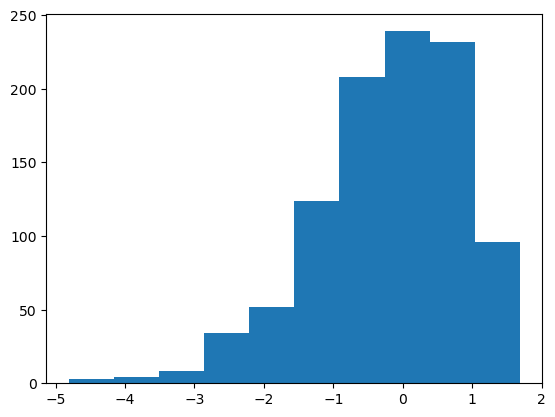

In [21]:
plt.hist(Ts_dth)

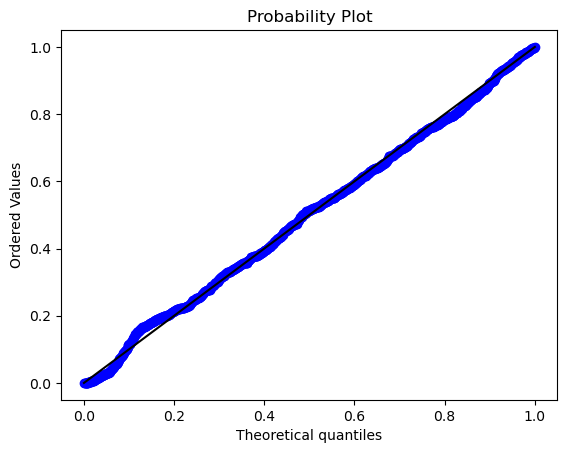

In [22]:
stats.probplot(ps_dth, dist = 'uniform', plot=plt, fit=False)
plt.plot([0, 1], [0, 1], color='black')
plt.show()

In [23]:
np.mean(np.abs(Ts_dth) < stats.norm.ppf(0.975))

0.933

# 6. Sandwich estimator coverage test

In [24]:
L_HAC = np.floor(4* (T/100)**(2/9))

In [25]:
w_HAC = np.maximum(1 - np.abs(np.arange(T)[:,None] - np.arange(T))/L_HAC, 0)

In [26]:
Ihs_sdw = np.zeros([num_sim, 2+d, 2+d])
Ts_sdw = np.zeros(num_sim)
ps_sdw = np.zeros(num_sim)

In [28]:
for iter_sim in np.arange(num_sim):
    start_sim = time.time()
    
    shat_eps = ssim_eps[iter_sim,-1]
    mhat_0 = msim_0[iter_sim,-1]
    bhat = bsim[iter_sim,-1,:]
    Y_data = Ys_sim[iter_sim]
    
    Rhat = np.zeros(T+T0)
    d1Rh = np.zeros([d, T+T0])
    d2Rh = np.zeros([d, d, T+T0])
    
    for t in np.arange(T+T0):
        o = np.exp(bhat @ A[t])
        p = 1 / (1 + o)
        q = o / (1 + o)

        Rhat[t] = K * p
        d1Rh[:,t] = - K * p * q * A[t]
        d2Rh[:,:,t] = K * p * q * (q - p) * (A[t,:,None] * A[t])
        
    Pi = alpha * np.concatenate([[0],pi])[np.maximum(0, T0 + np.arange(T)[:,None] - np.arange(T+T0))]
    G = Rhat[:,None] * np.concatenate([[0],g])[np.maximum(0, np.arange(T+T0)[:,None] - np.arange(T+T0))]
    d1G = d1Rh[:,:,None] * np.concatenate([[0],g])[
            np.maximum(0, np.arange(T+T0)[:,None] - np.arange(T+T0))]
    d2G = d2Rh[...,None] * np.concatenate([[0],g])[
            np.maximum(0, np.arange(T+T0)[:,None] - np.arange(T+T0))]
    
    inv_ImG = la.inv(np.eye(T+T0)-G)
    Pi_inv_ImG = Pi @ inv_ImG
    
    EY = mhat_0 * Pi_inv_ImG[:,0]
    d1EY = mhat_0 * (Pi_inv_ImG @ (d1G @ inv_ImG[:,:1]))[...,0]
    d2EY = mhat_0 * (Pi_inv_ImG @ (
        d1G[:,None] @ inv_ImG @ d1G @ inv_ImG[:,:1]
        + d1G @ inv_ImG @ d1G[:,None] @ inv_ImG[:,:1]
        + d2G @ inv_ImG[:,:1]))[...,0]
    
    dlt_dm = Pi_inv_ImG[:,0] * (Y_data - EY) / smle_eps**2
    dlt_dsp = - 1 / smle_eps + (Y_data - EY)**2 / smle_eps**3
    dlt_db = d1EY * (Y_data - EY) / smle_eps**2
    
    dlt_dth = np.concatenate([np.array([dlt_dm, dlt_dsp]), dlt_db], 0)
    VEdl = dlt_dth @ w_HAC @ dlt_dth.T

    Ihs_sdw[iter_sim] = Ihs_dth[iter_sim] @ la.inv(VEdl) @ Ihs_dth[iter_sim]
    Ts_sdw[iter_sim] = (bhat[1]-bmle[1])/np.sqrt(la.inv(Ihs_sdw[iter_sim])[-1,-1])
    ps_sdw[iter_sim] = 2*(1-stats.norm.cdf(np.abs(Ts_sdw[iter_sim])))
    
    sys.__stdout__.write("%d-th simulation finished, %f sec.\n"
                         %(iter_sim+1, time.time()-start_sim))
    sys.__stdout__.flush()

1-th simulation finished, 0.011540 sec.
2-th simulation finished, 0.012784 sec.
3-th simulation finished, 0.004726 sec.
4-th simulation finished, 0.006494 sec.
5-th simulation finished, 0.005010 sec.
6-th simulation finished, 0.009875 sec.
7-th simulation finished, 0.005617 sec.
8-th simulation finished, 0.004759 sec.
9-th simulation finished, 0.003141 sec.
10-th simulation finished, 0.006777 sec.
11-th simulation finished, 0.004093 sec.
12-th simulation finished, 0.004117 sec.
13-th simulation finished, 0.004424 sec.
14-th simulation finished, 0.012879 sec.
15-th simulation finished, 0.009527 sec.
16-th simulation finished, 0.004537 sec.
17-th simulation finished, 0.004817 sec.
18-th simulation finished, 0.004775 sec.
19-th simulation finished, 0.004418 sec.
20-th simulation finished, 0.004678 sec.
21-th simulation finished, 0.005072 sec.
22-th simulation finished, 0.009073 sec.
23-th simulation finished, 0.006184 sec.
24-th simulation finished, 0.004629 sec.
25-th simulation finished

214-th simulation finished, 0.008050 sec.
215-th simulation finished, 0.009684 sec.
216-th simulation finished, 0.008937 sec.
217-th simulation finished, 0.004991 sec.
218-th simulation finished, 0.010501 sec.
219-th simulation finished, 0.006598 sec.
220-th simulation finished, 0.007189 sec.
221-th simulation finished, 0.006865 sec.
222-th simulation finished, 0.003461 sec.
223-th simulation finished, 0.008363 sec.
224-th simulation finished, 0.004099 sec.
225-th simulation finished, 0.003267 sec.
226-th simulation finished, 0.004326 sec.
227-th simulation finished, 0.007916 sec.
228-th simulation finished, 0.004520 sec.
229-th simulation finished, 0.006062 sec.
230-th simulation finished, 0.004396 sec.
231-th simulation finished, 0.005406 sec.
232-th simulation finished, 0.002526 sec.
233-th simulation finished, 0.005092 sec.
234-th simulation finished, 0.006513 sec.
235-th simulation finished, 0.004011 sec.
236-th simulation finished, 0.005904 sec.
237-th simulation finished, 0.0053

412-th simulation finished, 0.004365 sec.
413-th simulation finished, 0.005095 sec.
414-th simulation finished, 0.004873 sec.
415-th simulation finished, 0.011253 sec.
416-th simulation finished, 0.002803 sec.
417-th simulation finished, 0.002464 sec.
418-th simulation finished, 0.002661 sec.
419-th simulation finished, 0.004602 sec.
420-th simulation finished, 0.004794 sec.
421-th simulation finished, 0.004736 sec.
422-th simulation finished, 0.003971 sec.
423-th simulation finished, 0.008113 sec.
424-th simulation finished, 0.004776 sec.
425-th simulation finished, 0.027112 sec.
426-th simulation finished, 0.016074 sec.
427-th simulation finished, 0.012163 sec.
428-th simulation finished, 0.011354 sec.
429-th simulation finished, 0.007059 sec.
430-th simulation finished, 0.008917 sec.
431-th simulation finished, 0.011495 sec.
432-th simulation finished, 0.011523 sec.
433-th simulation finished, 0.004135 sec.
434-th simulation finished, 0.004463 sec.
435-th simulation finished, 0.0042

617-th simulation finished, 0.022081 sec.
618-th simulation finished, 0.021335 sec.
619-th simulation finished, 0.006469 sec.
620-th simulation finished, 0.002877 sec.
621-th simulation finished, 0.005927 sec.
622-th simulation finished, 0.007818 sec.
623-th simulation finished, 0.004744 sec.
624-th simulation finished, 0.005835 sec.
625-th simulation finished, 0.004283 sec.
626-th simulation finished, 0.004468 sec.
627-th simulation finished, 0.004706 sec.
628-th simulation finished, 0.004246 sec.
629-th simulation finished, 0.004919 sec.
630-th simulation finished, 0.006248 sec.
631-th simulation finished, 0.004282 sec.
632-th simulation finished, 0.005672 sec.
633-th simulation finished, 0.004558 sec.
634-th simulation finished, 0.004196 sec.
635-th simulation finished, 0.003668 sec.
636-th simulation finished, 0.004459 sec.
637-th simulation finished, 0.005361 sec.
638-th simulation finished, 0.004201 sec.
639-th simulation finished, 0.004394 sec.
640-th simulation finished, 0.0046

813-th simulation finished, 0.004690 sec.
814-th simulation finished, 0.010811 sec.
815-th simulation finished, 0.004141 sec.
816-th simulation finished, 0.005673 sec.
817-th simulation finished, 0.006689 sec.
818-th simulation finished, 0.008042 sec.
819-th simulation finished, 0.004554 sec.
820-th simulation finished, 0.006254 sec.
821-th simulation finished, 0.004221 sec.
822-th simulation finished, 0.004972 sec.
823-th simulation finished, 0.004247 sec.
824-th simulation finished, 0.004468 sec.
825-th simulation finished, 0.004653 sec.
826-th simulation finished, 0.007828 sec.
827-th simulation finished, 0.004279 sec.
828-th simulation finished, 0.007518 sec.
829-th simulation finished, 0.004082 sec.
830-th simulation finished, 0.004600 sec.
831-th simulation finished, 0.005277 sec.
832-th simulation finished, 0.004220 sec.
833-th simulation finished, 0.006268 sec.
834-th simulation finished, 0.004272 sec.
835-th simulation finished, 0.004190 sec.
836-th simulation finished, 0.0040

(array([  2.,   3.,   3.,  16.,  57., 120., 272., 330., 169.,  28.]),
 array([-7.13831828, -6.14007194, -5.1418256 , -4.14357926, -3.14533292,
        -2.14708658, -1.14884024, -0.1505939 ,  0.84765244,  1.84589878,
         2.84414512]),
 <BarContainer object of 10 artists>)

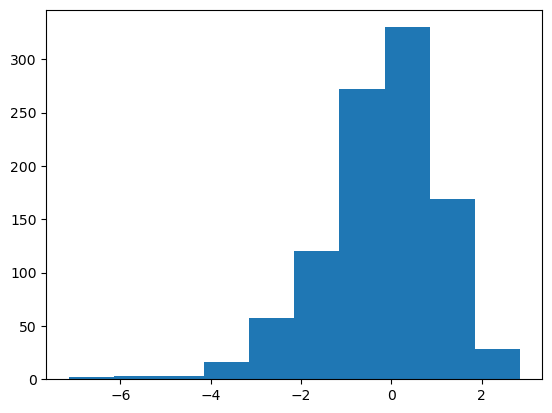

In [29]:
plt.hist(Ts_sdw)

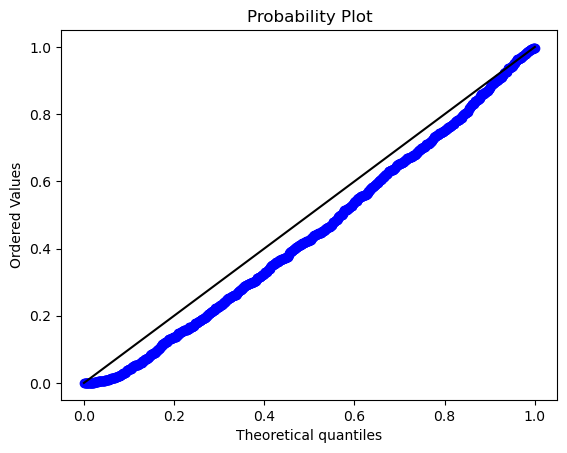

In [30]:
stats.probplot(ps_sdw, dist = 'uniform', plot=plt, fit=False)
plt.plot([0, 1], [0, 1], color='black')
plt.show()

In [31]:
np.mean(np.abs(Ts_sdw) < stats.norm.ppf(0.975))

0.889